In [33]:
import pandas as pd
import geopandas as gp
import numpy as np
import zipfile #i am not giving it a name cause i intend to use it only once
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [34]:


cbp94, cbp95, cbp96, cbp97, cbp98, cbp99, cbp00, cbp01 = [],[],[],[],[],[],[],[]
cbp02, cbp03, cbp04, cbp05, cbp06, cbp07, cbp08, cbp09 = [],[],[],[],[],[],[],[]
cbp10, cbp11, cbp12, cbp13 = [],[],[],[]

years = [cbp94, cbp95, cbp96, cbp97, cbp98, cbp99, cbp00, cbp01,
         cbp02, cbp03, cbp04, cbp05, cbp06, cbp07, cbp08, cbp09, 
         cbp10, cbp11, cbp12, cbp13]

fname = ["zbp94totals.zip", "zbp95totals.zip", "zbp96totals.zip", "zbp97totals.zip",
         "zbp98totals.zip", "zbp99totals.zip", "zbp00totals.zip", "zbp01totals.zip",
         "zbp02totals.zip", "zbp03totals.zip", "zbp04totals.zip", "zbp05totals.zip",
         "zbp06totals.zip", "zbp07totals.zip", "zbp08totals.zip", "zbp09totals.zip",
         "zbp10totals.zip", "zbp11totals.zip", "zbp12totals.zip", "zbp13totals.zip"]

colsToDrop = ['qp1_nf', 'ap_nf', 'emp_nf', 'city', 'stabbr', 'cty_name']
colsToDrop2 = ['emp_nf','ap_nf', 'emp_nf', 'qp1_nf']

a = 0
for x in fname:
    zf = zipfile.ZipFile(x)
    
    df = pd.read_csv(zf.open(x.replace('.zip','.txt')))

    years[a] = df
    a += 1
    
    
    

In [35]:
years_cut = years

In [36]:
#Cleaning data by removing unnessisary columns - remaining columns are
# 'zip', 'name', 'empflag', 'emp', 'qp1', 'ap', 'est'

years_cut[4].columns = ['zip', 'name', 'empflag', 'emp', 'qp1', 'ap', 'est']
years_cut[5].columns = ['zip', 'name', 'empflag', 'emp', 'qp1', 'ap', 'est']
years_cut[6].columns = ['zip', 'name', 'empflag', 'emp', 'qp1', 'ap', 'est']
years_cut[7].columns = ['zip', 'name', 'empflag', 'emp', 'qp1', 'ap', 'est']
years_cut[8].columns = ['zip', 'name', 'empflag', 'emp', 'qp1', 'ap', 'est']

years_cut[13] = years_cut[13].drop(colsToDrop2, axis=1)
years_cut[14] = years_cut[14].drop(colsToDrop2, axis=1)
years_cut[15] = years_cut[15].drop(colsToDrop2, axis=1)

years_cut[16] = years_cut[16].drop(colsToDrop, axis=1)
years_cut[17] = years_cut[17].drop(colsToDrop, axis=1)
years_cut[18] = years_cut[18].drop(colsToDrop, axis=1)
years_cut[19] = years_cut[19].drop(colsToDrop, axis=1)

years_cut[19].head()



zip            name empflag    emp    qp1      ap  est
0   501  HOLTSVILLE, NY       A      0      0       0    2
1  1001      AGAWAM, MA     NaN   9418  92083  373116  439
2  1002     AMHERST, MA     NaN  17263  95047  398992  572
3  1003     AMHERST, MA     NaN    184   1754    7181   15
4  1004     AMHERST, MA     NaN    179   1168    5019   16

In [37]:
#check to see all columns have same name for reference

#for x in years:
#    print x.columns 

In [38]:
#Reading GeoJson File for Zip Codes in NYC

fname = "nyc-zip-code-tabulation-areas-polygons.geojson"

df1 = gp.read_file(fname)

print(type(df1))

df1.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


@id  BLDGpostalCode CTY_FIPS  \
0  http://nyc.pediacities.com/Resource/PostalCode...               0      081   
1  http://nyc.pediacities.com/Resource/PostalCode...               0      081   
2  http://nyc.pediacities.com/Resource/PostalCode...               0      081   
3  http://nyc.pediacities.com/Resource/PostalCode...               0      081   
4  http://nyc.pediacities.com/Resource/PostalCode...               0      081   

   OBJECTID          PO_NAME STATE ST_FIPS      Shape_Area    Shape_Leng  \
0         1  Jackson Heights    NY      36  20163283.87440  20624.692317   
1         2        Glen Oaks    NY      36  22606526.91390  23002.816039   
2         3    New Hyde Park    NY      36   6269333.41234  15749.161511   
3         4        Bellerose    NY      36  49418364.05770  35932.810639   
4         5    Fresh Meadows    NY      36  69385865.59430  38693.565676   

  borough                                           geometry postalCode  
0  Queens  POLYGON ((-73.86942457284175 40.74915687096787...      11372  
1  Queens  POLYGON ((-73.71068374074007 40.75004039450917...      11004  
2  Queens  POLYGON ((-73.70098278625547 40.73889569923034...      11040  
3  Queens  POLYGON ((-73.72270447144122 40.75373371438336...      11426  
4  Queens  POLYGON ((-73.81088634744755 40.72717187575918...      11365

In [39]:
#seting postalCode to int for Merge later
df1['postalCode'] = df1['postalCode'].astype(int)

In [40]:
df1.postalCode.dtype
df1['zip'] = df1['postalCode']

In [41]:
#creating list of nyc zip codes
nycZip = []
for x in df1['postalCode']:
    nycZip.append(x) 

In [42]:
print len(nycZip)
nycZip = sorted(nycZip)

262


In [43]:
#creating list of geodataframes for each year

poly_year = years_cut
a = 0
for year in years_cut:
    poly_cbp = pd.merge(df1, years_cut[a], how = 'left', on = 'zip', sort = 'zip')
    poly_year[a] = poly_cbp
    a += 1

In [44]:
#exploring data
#poly_year[1]

In [45]:
#mydata = [][]
col = range(1994,2014)
bus_est = pd.DataFrame(np.nan,index=nycZip,columns=col) 
#bus_est[1994][83]=5
a = 0
for x in col:
    b = 0
    for y in nycZip:
        bus_est[x][y] = poly_year[a]['est'][b]
        b += 1
    a += 1
#bus_est.to_csv('test.csv', index_label='zip') = check on data
bus_est2 = bus_est.drop_duplicates() 
#bus_est2.to_csv('test2.csv', index_label='zip') = remove some data
mydata = bus_est2.dropna() # drop rows containing nan
#mydata.to_csv('mydata.csv', index_label='zip')
len(mydata)# export to check data. All complete zipcodes present. final count 230

230

In [46]:
#poly_cbp = pd.merge(mydata, df1, how = 'left', on = 'zip', sort = 'zip')
mydata2 = mydata.reset_index()
mydata2['zip'] = mydata2['index']

In [47]:
mydata1 = mydata.copy()
zip1 = mydata.copy()

for i in range(len(mydata1)):
    mydata1.iloc[i] = (mydata1.iloc[i]-np.mean(mydata1.iloc[i]))/np.std(mydata1.iloc[i])

In [48]:
np.random.seed(123)

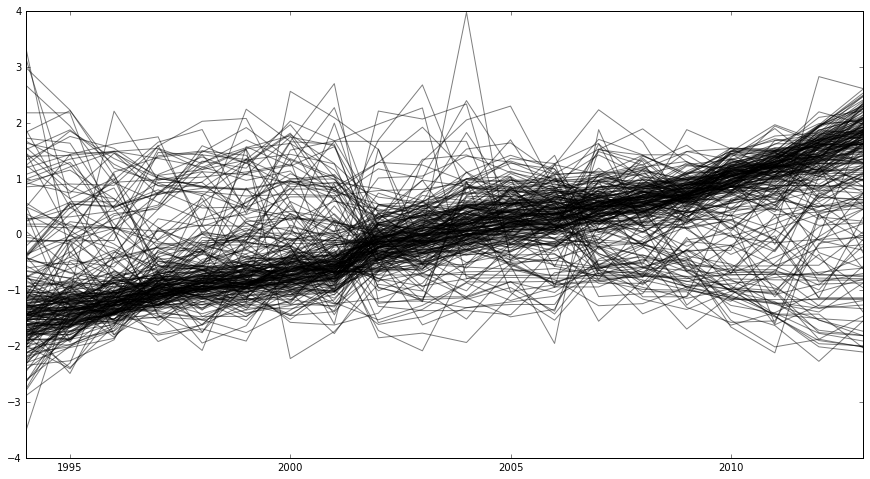

In [49]:
#visualizing data

pl.figure(figsize=(15,8))
pl.xlim(1994,2013)
for i in range(len(mydata1)):
    pl.plot(mydata1.iloc[i],'k',alpha=0.5)
 

In [50]:
poly_year_cut = poly_year
for x in range(20):
    poly_year_cut[x] = poly_year_cut[x][poly_year_cut[x]['est'] >= 0]
    
    

In [51]:
nycZip = sorted(nycZip)

In [52]:
import scipy.cluster.vq as vq



In [53]:
x = mydata1.values
a = range(0,20)

In [54]:
from sklearn.cluster import KMeans 

In [55]:
cluster1= ['1_Cluster','2_Clusters','3_Clusters','4_Clusters','5_Clusters','6_Clusters']
clusters= ['1_Cluster','2_Clusters','3_Clusters','4_Clusters','5_Clusters','6_Clusters']

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


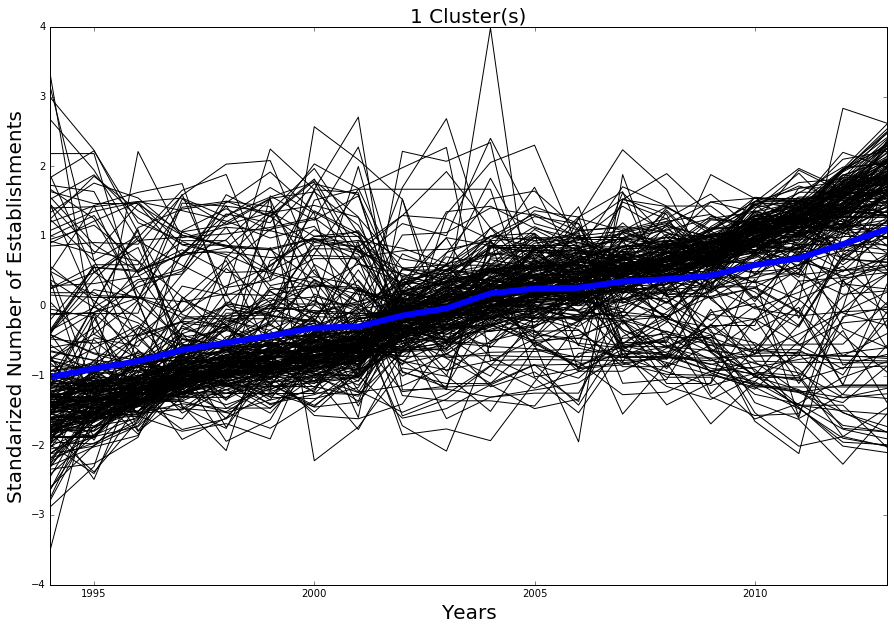

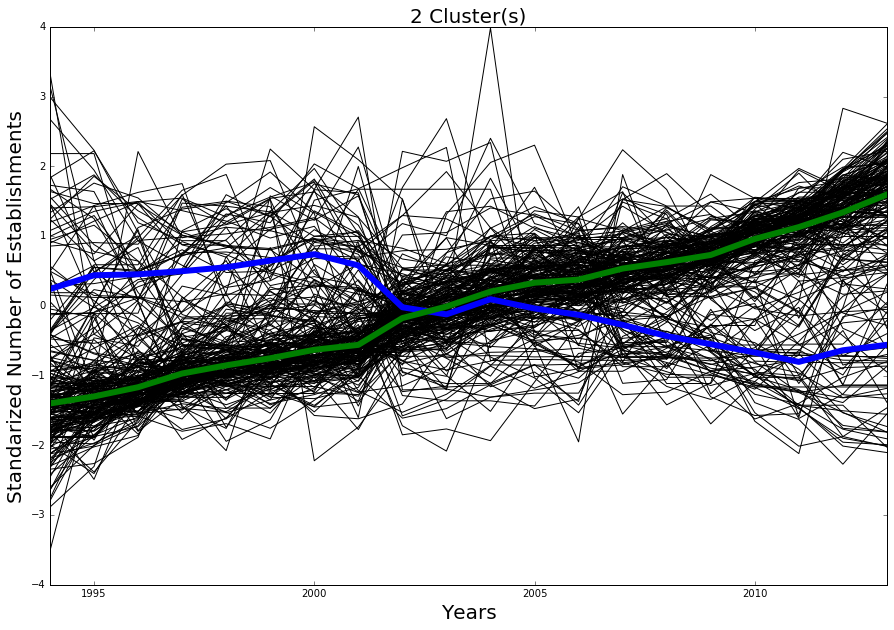

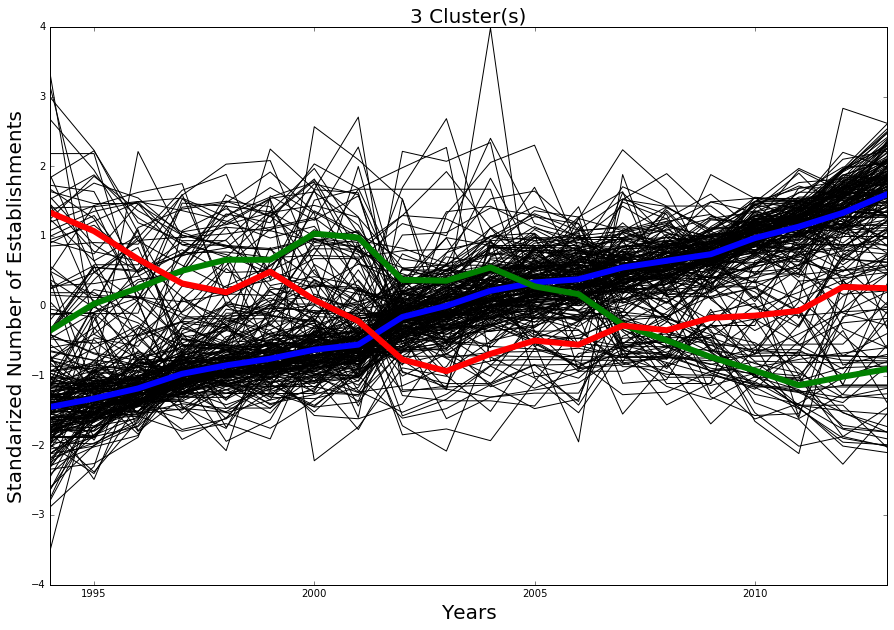

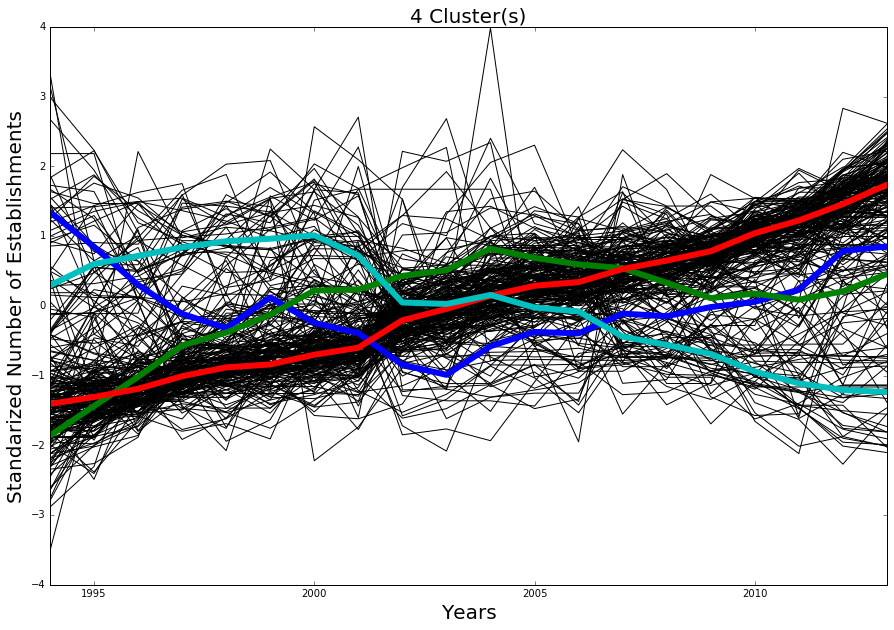

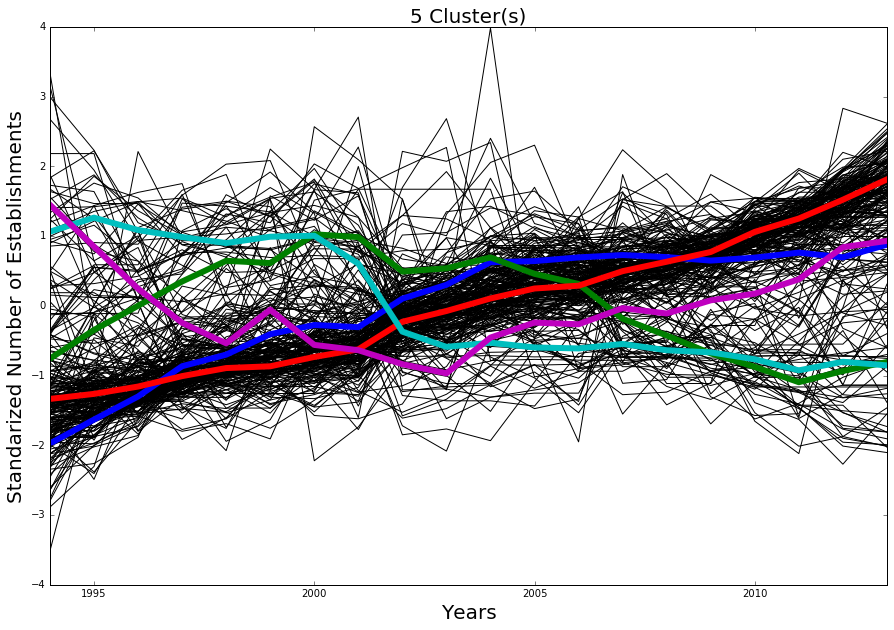

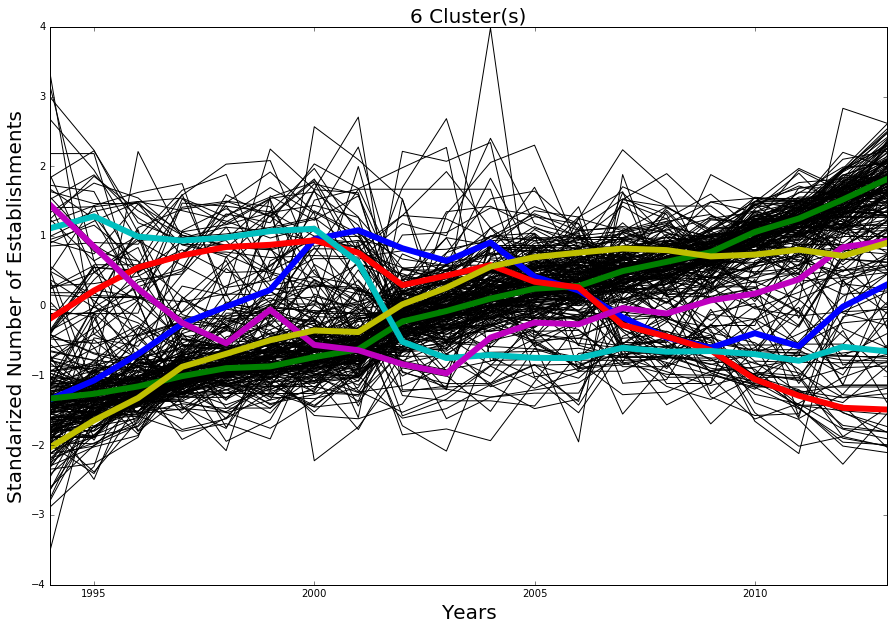

In [56]:
for z in range(1,len(cluster1)+1):
    k_means = KMeans(init='k-means++', n_clusters=z, n_init=10)
    k_means.fit(x)
    k_means_labels = k_means.labels_
    clusters[z-1] = k_means_labels
    k_means_cluster_centers = k_means.cluster_centers_
    k_means_cluster_centers.shape
    k_means_labels_unique = np.unique(k_means_labels)
    mydata[z-1] = clusters[z-1]
    k_means_cluster_centers
    pl.figure(figsize=(15,10))
    pl.xlim(0,19)
    pl.plot(x.T, 'k');
    for a in range(len(k_means_labels_unique)):
        pl.plot(k_means_cluster_centers[a].T, linewidth = 6)
    pl.xlabel("Years", fontsize=20)
    pl.ylabel('Standarized Number of Establishments',fontsize=20)

    pl.title("%s Cluster(s)"%z ,fontsize=20)
    pl.xticks( [1,6,11,16], [1995,2000,2005,2010] )

In [57]:
#adding clusters association to zip codes
mydata.head()

1994  1995  1996  1997  1998  1999  2000  2001  2002  2003  ...   2010  \
10001  6999  7088  7075  7154  7254  7233  7317  7188  7141  7084  ...   7241   
10002  1784  1819  1919  2049  2003  2085  2277  2543  2269  2402  ...   2872   
10003  3256  3377  3417  3535  3649  3659  3683  3602  3616  3704  ...   4113   
10004  1115  1124  1133  1173  1176  1233  1294  1247  1253  1252  ...   1398   
10005  1076  1109  1216  1227  1270  1242  1287  1249  1244  1200  ...   1266   

       2011  2012  2013  0     1     2     3     4     5     
10001  7227  7235  7273     0     1     0     1     0     5  
10002  2912  2954  2988     0     1     0     2     2     1  
10003  4159  4214  4277     0     1     0     2     2     1  
10004  1404  1442  1479     0     1     0     2     2     1  
10005  1301  1273  1296     0     1     0     1     0     5  

[5 rows x 26 columns]

In [58]:
#seting a zipcode column for merge later
mydata = mydata.reset_index()
mydata['zip'] = mydata['index']
mydata.head()

index  1994  1995  1996  1997  1998  1999  2000  2001  2002  ...    2011  \
0  10001  6999  7088  7075  7154  7254  7233  7317  7188  7141  ...    7227   
1  10002  1784  1819  1919  2049  2003  2085  2277  2543  2269  ...    2912   
2  10003  3256  3377  3417  3535  3649  3659  3683  3602  3616  ...    4159   
3  10004  1115  1124  1133  1173  1176  1233  1294  1247  1253  ...    1404   
4  10005  1076  1109  1216  1227  1270  1242  1287  1249  1244  ...    1301   

   2012  2013  0  1  2  3  4  5    zip  
0  7235  7273  0  1  0  1  0  5  10001  
1  2954  2988  0  1  0  2  2  1  10002  
2  4214  4277  0  1  0  2  2  1  10003  
3  1442  1479  0  1  0  2  2  1  10004  
4  1273  1296  0  1  0  1  0  5  10005  

[5 rows x 28 columns]

In [59]:
#getting kmeans clusters into geodataframe

nyc_clust = pd.merge(df1, mydata, how = 'left', on = 'zip')



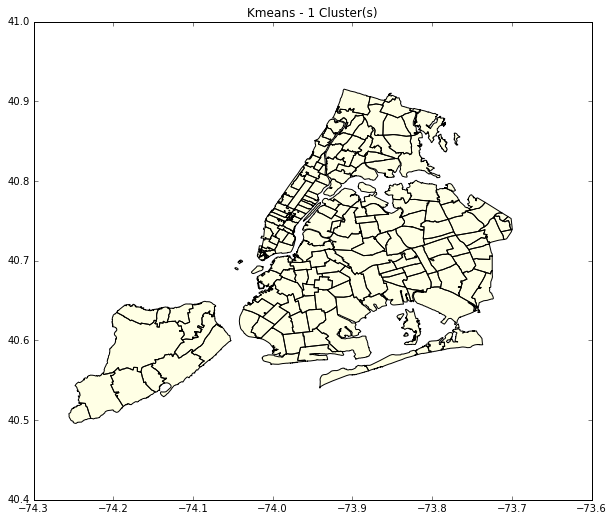

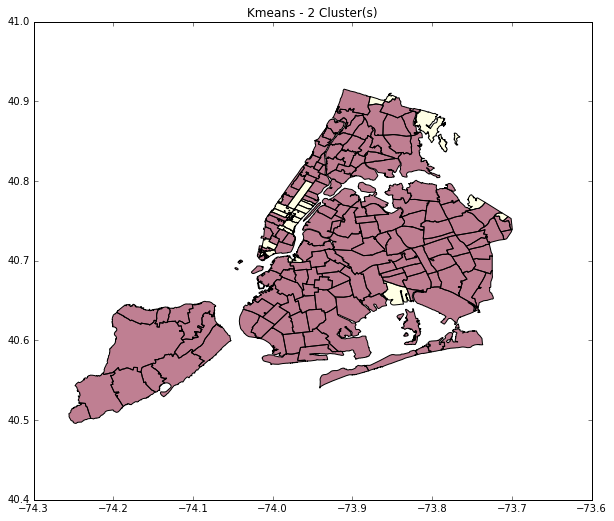

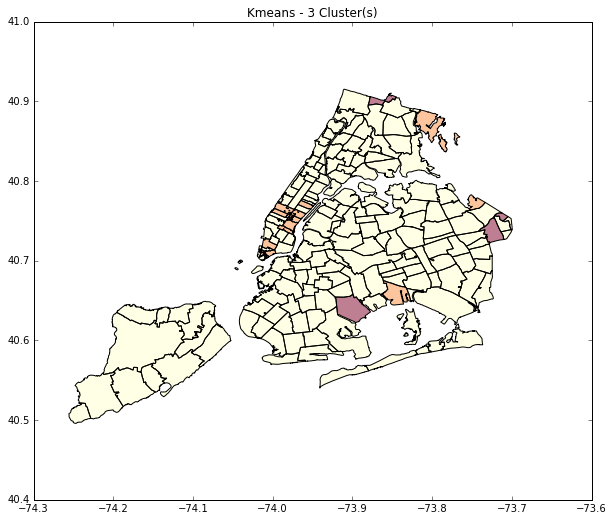

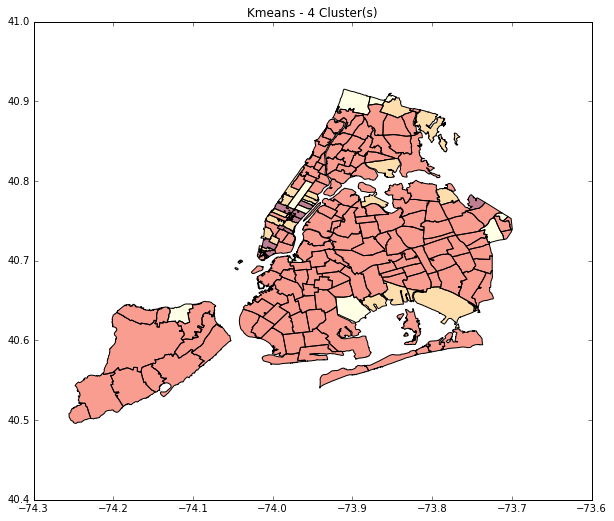

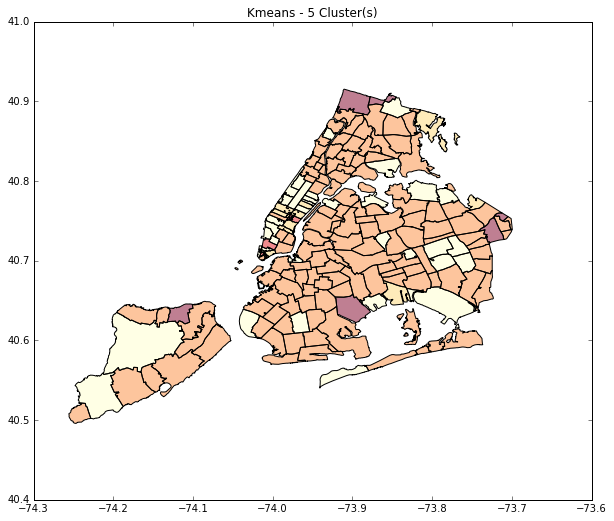

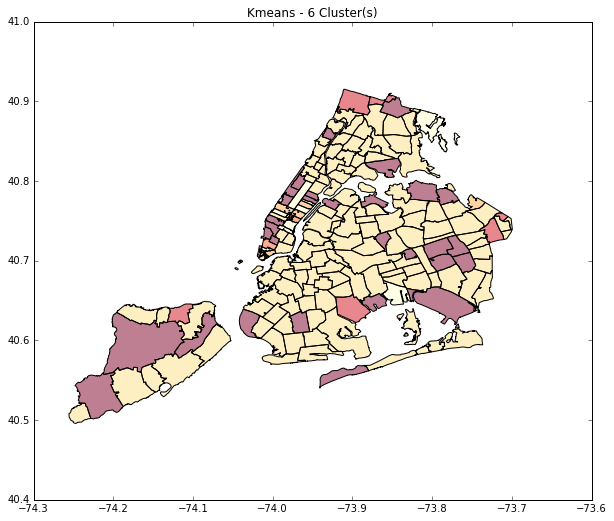

In [60]:
#ploting kmeans on map 

for kmean_clust in range(6):
    nyc_clust.plot(column=kmean_clust, alpha=.5, colormap='YlOrRd', figsize=(10,10))
    a = kmean_clust+1
    pl.title("Kmeans - %s Cluster(s)" % a)


In [61]:
from sklearn.cluster import DBSCAN 

In [62]:
#clustering through dbscan
db = DBSCAN(eps=0.6, min_samples=2).fit(x)
labels = (db.labels_).astype(int)
print labels
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
#clusters = pd.Series([mydata[labels == i] for i in xrange(num_clusters)])
print('Number of clusters: %d' % num_clusters)


[-1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1
 -1  0 -1  1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1
 -1 -1 -1 -1  0 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  3 -1 -1  4  3 -1 -1 -1 -1 -1 -1  3
  1  0 -1  0  0  0  0 -1 -1  0 -1  3 -1 -1  0 -1  0 -1  4 -1  0 -1 -1  4 -1
  0  1  2 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1]
Number of clusters: 5


In [63]:
#adding dbscan cluster category to df
mydata['dbscan'] = labels

##merging to geodataframe
final_shp = pd.merge( df1, mydata, how = 'left', on = 'zip')

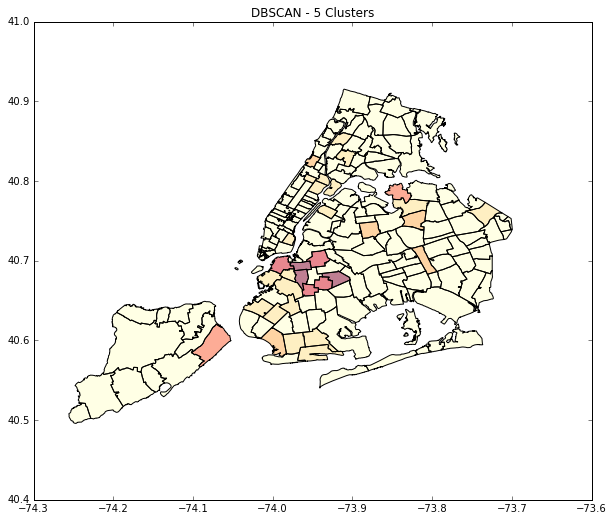

In [64]:
#plotting my 5 cluster DBSCAN by zipcode

final_shp.plot(column='dbscan', alpha=.5, colormap='YlOrRd', figsize=(10,10))
pl.title("DBSCAN - 5 Clusters")



It appears the DBSCAN is showing a different clustering in brooklyn when compared to kmeans. Unsure of why

As for interpreting kmeans: seeing a cluster happening in western side of manhattan and simalar est happening near jfk. Would be interesting to see what is going on between 1994 and 2013. Also clustering in eastern queens and south staten island. 